# Plotting with Cartopy

#### Overview
In this notebook, we will continue looking at ways to visualize ocean model output. As in previous lessons, we will use output from the ECCO Ocean State Estimate (Version 4).

#### Import Modules
First, import the modules required to access data from netCDF files and create plots:

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm

### Defining the data path
As in the previous lesson, we will use data stored on our external drive. Begin by defining the path to your data folder:

In [3]:
# Define a path to a data folder
data_folder = '/Users/cool/Downloads/Data'

In previous notebooks, we've plotted our data in longitude-latitude coordinates. Let's take a first look at some of the temperature data by making a quick plot:

In [4]:
# make a path to a temperature file
theta_file = os.path.join(data_folder, 'Version4','Release4',
                          'interp_monthly','THETA','THETA_2015_01.nc')

# read in the temperature data at along with the
# latitude and longitude information 
ds = xr.open_dataset(theta_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
Theta = np.array(ds['THETA'][:])
ds.close()

# subset temperature to the first time step and the surface
Theta = Theta[0, 0, :, :]

If we plot the temperature field as we did in previous lesson, we see a map that looks roughly like the globe:

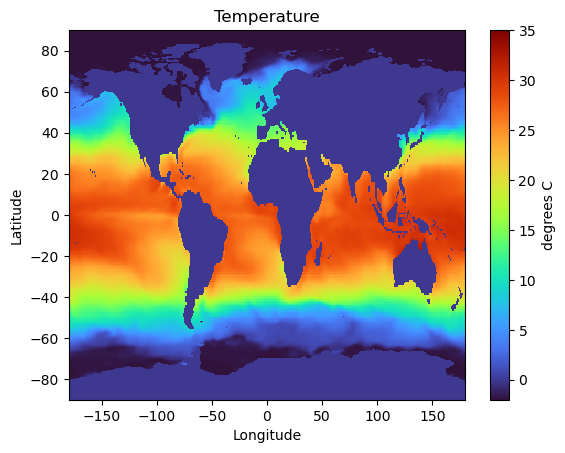

In [5]:
# create a figure object
fig = plt.figure()

# plot the temperature and add a colorbar
plt.pcolormesh(longitude, latitude, Theta, cmap='turbo', vmin=-2, vmax=35)
plt.colorbar(label='degrees C')
# format the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Temperature')
plt.show()

Looking at the temperature data in this view distorts the data because our map is focused on the equator. One way we could modify this is by changing the *projection* of our map.

## Part 2: Plotting with Cartopy
When we are working with numerical ocean model data, our numerical models represent locations on the globe. In these situations, it is helpful to plot our data in a projection that represents this aspect of our data. With this in mind, we'll invstigate plotting with the `cartopy` package which refers to **carto**graphy with **py**thon. 

In looking at the plot above, there's at least two things that are dissatisfying. First, the world is very distorted at the poles. Second, the continents are filled in with a default value of 0, which is a possible value for temperature - kinda confusing. We can remedy both of these using `cartopy` by choosing a better projection for our data and adding polygons that cover the coastline. 

Take a look at the plotting code below:

/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:806: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:806: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.co

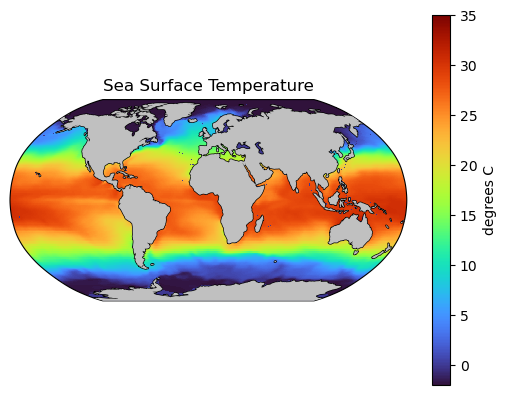

In [8]:
# create a figure object
fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))

# plot the temperature
plt.pcolormesh(longitude, latitude, Theta, cmap='turbo', vmin=-2, vmax=35,
              transform = ccrs.PlateCarree())
plt.colorbar(label='degrees C')

# add coastlines
ax.add_feature(cfeature.LAND, facecolor='silver', zorder=10)
ax.coastlines()

# format the axes
plt.title('Sea Surface Temperature')
plt.show()

### Projections
As you can see above, the axes object provides the projection system for the map. We see that a `projection` parameter has been set to a specific projection - in this case the `Robinson` projection. The `cartopy` package has a variety of different projections for plotting mapped data. Test some of the following common projections by modifying the plot above:

| Projection Code | Default Parameters |
|-----------------|--------------------|
| PlateCarree()  | central_longitude=0.0 |
| Mollweide()     | central_longitude=0.0 |
| Orthographic()  | central_longitude=0.0, central_latitude=0.0 |
| Robinson()      | central_longitude=0.0 |
| InterruptedGoodeHomolosine() | central_longitude=0.0 |

When you find your favorite projection, try changing the default central longitude/latitude to see how the plot changes.

### &#x2757; Note
In the plot above, the `transform=ccrs.PlateCarree()` keyword is crucial to plotting the data correctly. This line tells `cartopy` that the data is in longitude-latitude coordinates. Without this keyword, there is no way that `cartopy` will know how to put the data on the map.